**e-Learning Analytics project**
In this project we will do simple `Exploratory data analysis` with the available dataset.
- data cleaning
- data visualisation
- extracting useful insights from the data

In [249]:
# lets import necessary modules 
import pandas as pd
import numpy as np
df = pd.read_csv('.//csv_files//etutor.csv')
df.head()

,student_id,grade,subject,country,knowing_source,free_trial,tutoring_taken,worksheet_taken
0,1,A,math,india,blog,yes,yes,yes
1,2,C,math,us,youtube,no,no,no
2,3,F,science,india,instagram,no,no,yes
3,4,B,science,uk,youtube,yes,yes,no
4,5,A,english,india,facebook,no,no,no


In [250]:
#lets check the shape of our dataset
df.shape


(1000, 8)

In [254]:
#our dataframe has 1000 rows and 8 columns 
#lets look at the basic statistics for each column
g1 = df.groupby('subject')['subject'].count()
g1.describe()

count      3.000000
mean     333.333333
std       90.743227
min      231.000000
25%      298.000000
50%      365.000000
75%      384.500000
max      404.000000
Name: subject, dtype: float64

In [255]:
g2 = df.groupby('grade')['grade'].count()
g2.describe()

count      4.000000
mean     250.000000
std       96.895132
min      158.000000
25%      172.250000
50%      245.000000
75%      322.750000
max      352.000000
Name: grade, dtype: float64

In [256]:
g3 = df.groupby('country')['country'].count()
g3.describe()

count      5.00000
mean     200.00000
std      108.41356
min       81.00000
25%      136.00000
50%      154.00000
75%      300.00000
max      329.00000
Name: country, dtype: float64

In [257]:
g4 = df.groupby('knowing_source')['knowing_source'].count()
g4.describe()

count      4.000000
mean     249.250000
std      134.594143
min      141.000000
25%      147.750000
50%      214.000000
75%      315.500000
max      428.000000
Name: knowing_source, dtype: float64

In [258]:
g5 = df.groupby('free_trial')['free_trial'].count()
g5.describe()

count      2.000000
mean     500.000000
std       67.882251
min      452.000000
25%      476.000000
50%      500.000000
75%      524.000000
max      548.000000
Name: free_trial, dtype: float64

In [259]:
g6 = df.groupby('tutoring_taken')['tutoring_taken'].count()
g6.describe()

count      2.000000
mean     499.000000
std       52.325902
min      462.000000
25%      480.500000
50%      499.000000
75%      517.500000
max      536.000000
Name: tutoring_taken, dtype: float64

In [260]:
g7 = df.groupby('worksheet_taken')['worksheet_taken'].count()
g7.describe()

count      2.000000
mean     500.000000
std       52.325902
min      463.000000
25%      481.500000
50%      500.000000
75%      518.500000
max      537.000000
Name: worksheet_taken, dtype: float64

In [179]:
# DATA CLEANING - typically data cleaning is all about removing null values and fill it up with optimal value

df['grade'].isna().sum()

0

In [180]:
df['subject'].isna().sum()

0

In [181]:
df['country'].isna().sum()

0

In [182]:
df['knowing_source'].isna().sum()

3

In [183]:
df['knowing_source'].head(25)

0          blog
1       youtube
2     instagram
3       youtube
4      facebook
5     instagram
6      facebook
7       youtube
8     instagram
9       youtube
10         blog
11      youtube
12    instagram
13      youtube
14     facebook
15    instagram
16     facebook
17      youtube
18    instagram
19      youtube
20         blog
21          NaN
22    instagram
23      youtube
24     facebook
Name: knowing_source, dtype: object

In [184]:
df['free_trial'].isna().sum()

0

In [185]:
df['tutoring_taken'].isna().sum()

2

In [186]:
df['worksheet_taken'].isna().sum()

0

In [187]:
# from above results we know that two columns have few null values.
df1= df.copy()
df1 = df1.fillna({'knowing_source':'instagram', 'tutoring_taken':'no'})

In [188]:
#now as you see below we filled na value with the desired value
df1['knowing_source'].head(30)


0          blog
1       youtube
2     instagram
3       youtube
4      facebook
5     instagram
6      facebook
7       youtube
8     instagram
9       youtube
10         blog
11      youtube
12    instagram
13      youtube
14     facebook
15    instagram
16     facebook
17      youtube
18    instagram
19      youtube
20         blog
21    instagram
22    instagram
23      youtube
24     facebook
25    instagram
26     facebook
27      youtube
28    instagram
29      youtube
Name: knowing_source, dtype: object

In [189]:
df1.isnull().sum()

student_id         0
grade              0
subject            0
country            0
knowing_source     0
free_trial         0
tutoring_taken     0
worksheet_taken    0
dtype: int64

In [190]:
#now our dataset is cleaned
#lets convert text data into numerical data for further analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['le_subject'] = le.fit_transform(df1.subject)
df1['le_country'] = le.fit_transform(df1.country)
df1['le_knowing_source'] = le.fit_transform(df1.knowing_source)
df1['le_free_trial'] = le.fit_transform(df1.free_trial)
df1['le_tutoring_taken'] = le.fit_transform(df1.tutoring_taken)
df1['le_worksheet_taken'] = le.fit_transform(df1.worksheet_taken)
df1.head(10)

,student_id,grade,subject,country,knowing_source,free_trial,tutoring_taken,worksheet_taken,le_subject,le_country,le_knowing_source,le_free_trial,le_tutoring_taken,le_worksheet_taken
0,1,A,math,india,blog,yes,yes,yes,1,2,0,1,1,1
1,2,C,math,us,youtube,no,no,no,1,4,3,0,0,0
2,3,F,science,india,instagram,no,no,yes,2,2,2,0,0,1
3,4,B,science,uk,youtube,yes,yes,no,2,3,3,1,1,0
4,5,A,english,india,facebook,no,no,no,0,2,1,0,0,0
5,6,C,math,us,instagram,yes,yes,yes,1,4,2,1,1,1
6,7,F,english,us,facebook,no,no,yes,0,4,1,0,0,1
7,8,B,science,india,youtube,no,no,no,2,2,3,0,0,0
8,9,A,math,uk,instagram,yes,yes,no,1,3,2,1,1,0
9,10,B,math,us,youtube,yes,yes,yes,1,4,3,1,1,1


In [191]:
# for grade column we have to use ordinal encoder since grade are related like a>b>c>f
from sklearn.preprocessing import OrdinalEncoder
grade_order = ['F', 'C', 'B', 'A']
o_encodr = OrdinalEncoder(categories=[grade_order])
df1['oe_grade'] = o_encodr.fit_transform(df1[['grade']])
df1.head(10)


,student_id,grade,subject,country,knowing_source,free_trial,tutoring_taken,worksheet_taken,le_subject,le_country,le_knowing_source,le_free_trial,le_tutoring_taken,le_worksheet_taken,oe_grade
0,1,A,math,india,blog,yes,yes,yes,1,2,0,1,1,1,3.0
1,2,C,math,us,youtube,no,no,no,1,4,3,0,0,0,1.0
2,3,F,science,india,instagram,no,no,yes,2,2,2,0,0,1,0.0
3,4,B,science,uk,youtube,yes,yes,no,2,3,3,1,1,0,2.0
4,5,A,english,india,facebook,no,no,no,0,2,1,0,0,0,3.0
5,6,C,math,us,instagram,yes,yes,yes,1,4,2,1,1,1,1.0
6,7,F,english,us,facebook,no,no,yes,0,4,1,0,0,1,0.0
7,8,B,science,india,youtube,no,no,no,2,2,3,0,0,0,2.0
8,9,A,math,uk,instagram,yes,yes,no,1,3,2,1,1,0,3.0
9,10,B,math,us,youtube,yes,yes,yes,1,4,3,1,1,1,2.0


  **LABEL ENCODED VALUES**
          
  - `country` aus==>0 ,  canada==>1 ,  india==>2 ,  uk==>3 ,  us==>4 
  - `subject` english==>0 ,  math==>1,  science==>2 
  - `source`  blog==>0, facebook==>1, insta ==>2, youtube==>3
  - `free trial` no ==>0,  yes ==>1 
  - `tutoring_taken` no ==>0, yes ==>1 
  - `worksheet_taken` no ==>0, yes ==>1 
  - `grade`  F==>0, C==>1, B==>2, A==>3

In [192]:
# lets drop the text datas and keep ncessary columns for visualization
df2 = df1.drop(labels=['grade','subject','country','knowing_source','free_trial','tutoring_taken','worksheet_taken'], axis=1)
df2.head()

,student_id,le_subject,le_country,le_knowing_source,le_free_trial,le_tutoring_taken,le_worksheet_taken,oe_grade
0,1,1,2,0,1,1,1,3.0
1,2,1,4,3,0,0,0,1.0
2,3,2,2,2,0,0,1,0.0
3,4,2,3,3,1,1,0,2.0
4,5,0,2,1,0,0,0,3.0


In [193]:
df_oiginal = df1.drop(labels=['le_subject','oe_grade','le_country','le_knowing_source',
                              'le_free_trial','le_tutoring_taken','le_worksheet_taken'], axis=1)
df_oiginal.head()

,student_id,grade,subject,country,knowing_source,free_trial,tutoring_taken,worksheet_taken
0,1,A,math,india,blog,yes,yes,yes
1,2,C,math,us,youtube,no,no,no
2,3,F,science,india,instagram,no,no,yes
3,4,B,science,uk,youtube,yes,yes,no
4,5,A,english,india,facebook,no,no,no


In [194]:
#DATA VISUALIZATION
# lets analyze subject 
df_oiginal.groupby('subject')['subject'].count()


subject
english    231
math       404
science    365
Name: subject, dtype: int64

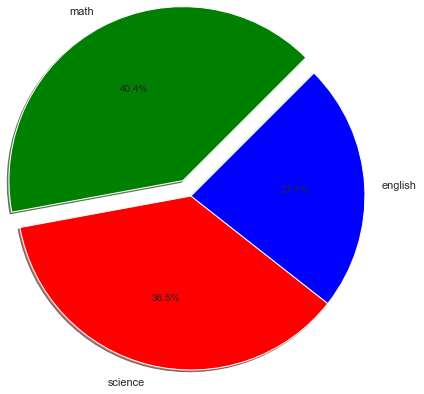

In [265]:
# pie chart represents contibutions of each subject enrolled by students as a whole.
import matplotlib.pyplot as plt
%matplotlib inline

subject_vals = [404, 365, 231]
subject_labels = ["math","science","english"]
mycolors = ['green', 'red', 'blue']
plt.pie(subject_vals,labels=subject_labels, shadow=True, autopct='%1.1f%%',radius=2,
        explode=[0.2,0,0],counterclock=True, startangle=45, colors=mycolors)

plt.show()

## 1.) Insights from the above visualization
 - it is clear with the present data that among the three subjects the most enrolled one is maths which contributes `40.4%`
   followed by science `36.5%` and english `23.1%` as a whole

  

In [196]:
# lets analyze subject 
df_oiginal.groupby('country')['country'].count()

country
aus        81
canada    154
india     329
uk        136
us        300
Name: country, dtype: int64

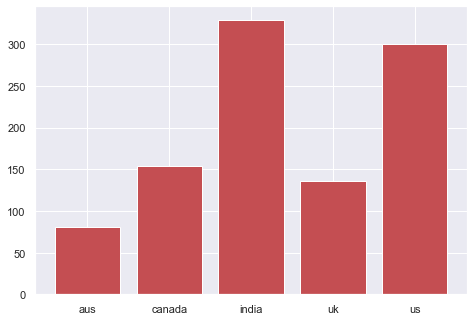

In [264]:
# Bar plot shows the number of students enrolled for the courses from different countries.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ctry_values = [81,154,329,136,300]
country_labels = ["aus","canada",'india','uk','us']
ax.bar(country_labels,ctry_values, color='r')
plt.show()

## 2.) Insights from the above visualization
  - among 5 countries `india` comes first with a total of `329-students` followed by `unites states` with `300-students`
    and vice versa... from the total of about `1000-students`

In [198]:
df_oiginal.groupby('knowing_source')['knowing_source'].count()

knowing_source
blog         141
facebook     150
instagram    281
youtube      428
Name: knowing_source, dtype: int64

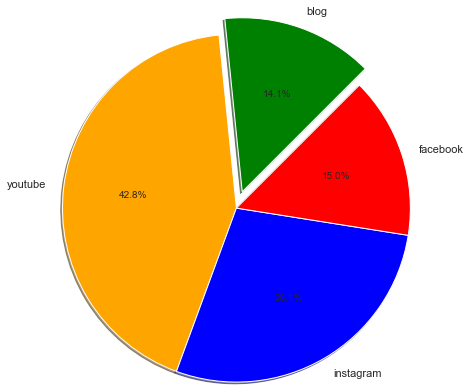

In [199]:
#pie chart shows how much % each source contribute as a whole
sources = ['blog', 'youtube', 'instagram', 'facebook']
students = [141,428,281,150]
mycolors = ['green', 'orange', 'blue', 'red']
plt.pie(students,labels=sources, shadow=True, autopct='%1.1f%%',radius=2,
        explode=[0.2,0,0,0],counterclock=True, startangle=45, colors=mycolors)
plt.show()

## 3.) Insights from the above visualization
  - from the above social media platforms about `42.8%` 0f the students hear about our firm from `youtube`, `28.1%` of the       students from `instagram`, `15%` of the students from `facebook` and `14.1%` from `blogs`.
  - with this insight we can consider investing some more amount on advertisement in `youtube` & `instagram` or we can focus 
    on developing the least contributors such as `facebook` & `blogs`.
  

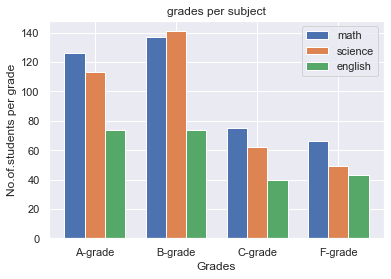

In [281]:
#from mysql queries we found datapoints for each grades per subject
grades = ['A-grade','B-grade','C-grade','F-grade']
math_grades = [126, 137, 75, 66]
science_grades = [113, 141, 62, 49]
english_grades = [74, 74, 40, 43]
xpos = np.arange(len(grades))

plt.xticks(xpos, grades)
plt.title('grades per subject')
plt.xlabel('Grades')
plt.ylabel('No.of.students per grade')
plt.bar(xpos-0.25, math_grades, width=0.25, label='math')
plt.bar(xpos+0, science_grades, width=0.25,label='science')
plt.bar(xpos+0.25, english_grades, width=0.25,label='english')
plt.legend()


## 4.) Insights from the above visualization
   - comparing grades with respect to subject is a common phenomenon in learning analytics
   - In case of `A`,`C`,`F` grades the results are mostly similar with `math-students` got higher numbers followed by 
     `science` & `english` students it seems biased that it may be due to the reason that `math-subject` has got the highest 
     number of students enrolled.
   - but in the case of `B-grade` `science` becomes the highest contributor with `141-students` again it may be due to several      factors we might find did if we have more data with us.

In [237]:
'''
ft = df2['le_free_trial']
tt = df2['le_tutoring_taken']
wt = df2['le_worksheet_taken']
def possible_tutor_booking(free_trial, tutoring_taken, worksheet_taken):
    ft_result = 0
    tt_result = 0
    wt_result = 0
    for val in free_trial:
        if val == 1:
            ft_result += 1
    return ft_result
    print('no of students took free trials are:', ft_result)
        for va in tutoring_taken:
            if va ==1 and val == 1:
                tt_result += 1
        return tt_result
        print('no of students took both free trial & tutoring are:', ft_tt_result)
            for va in tutoring_taken:
                if va ==1 and val == 1:
                    wt_result += 1
            return wt_result
    
'''
          

In [243]:
total_free_trials_scheduled = df2['le_free_trial'].sum()
print('total free trials scheduled:',total_free_trials_scheduled)
total_tutorings_taken = df2['le_tutoring_taken'].sum()
print('no of students booked tutoring:',total_tutorings_taken)
total_worksheet_taken = df2['le_worksheet_taken'].sum()
print('no of students took worksheet:',total_worksheet_taken)

total free trials scheduled: 452
no of students booked tutoring: 462
no of students took worksheet: 463


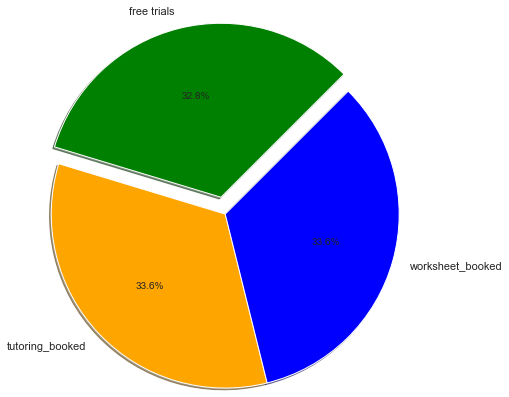

In [247]:
# pie chart shows the above values


bookings = ['free trials', 'tutoring_booked', 'worksheet_booked']
values = [452, 462, 463]
mycolors = ['green', 'orange', 'blue']
plt.pie(values,labels=bookings, shadow=True, autopct='%1.1f%%',radius=2,
        explode=[0.2,0,0],counterclock=True, startangle=45, colors=mycolors)
plt.show()

## 5.) Insights from the above visualization
  - `32.8%` of the students scheduled `free_trial` in our website as a whole, which is `452-students` out of `1000-students`.
  - `33.6%` of the students have taken `tutoring` which is `462-students` out of `1000-students`.
  - similarly `33.6%` of the students have taken `worksheet` which is `463-students` out of `1000-students`
  

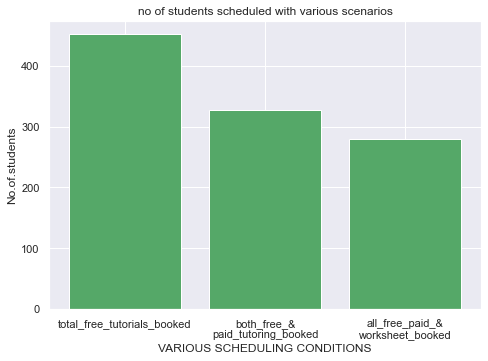

In [280]:
#from our sql queries we found the below crucial data for insights
total_free_trials = 452
both_free_trial_tutoring = 327
all_three_bookings = 279
#histogram represents above data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('no of students scheduled with various scenarios')
plt.xlabel('VARIOUS SCHEDULING CONDITIONS')
plt.ylabel('No.of.students')
taken_values = [452, 327, 279]
taken_labels = ["total_free_tutorials_booked","both_free_&\npaid_tutoring_booked","all_free_paid_&\nworksheet_booked"]
ax.bar(taken_labels,taken_values, color='g')
plt.show()

## 6.) Insights from the above visualization
  - Totally `452-students` out of `1000-students`  scheduled `free_trial` as before
  - among these `452-students` who has scheduled `free_trial` almost `327-students` has taken `tutoring` in otherwords around 
    `72%` of the students who scheduled `free_trial` meant to take `tutoring` which shows the high probability.
  - similarly `279-students` among `452-students` who has scheduled `free_trial` meant to take both `tutoring` as well as
    `worksheet` which is around `62%` students as a whole.